# PART 2
# Section 13: Sympy

Sympy is a library for symbolic mathematics in Python. Additionally, it offers a variety of functions, solvers, constants, and other modules.

## 13.1 - Basic Operations


| Function / Method | Description |
|-------------------|-------------|
| sp.symbols(arg)   | function that generates symbolic values |
| sp.simplify(arg)  | function that simplifies an expression |
| sp.init_printing()| repr that prints in latex format |
| eq.subs(sym, val)| method that substitutes the symbolic by a value |


**Notes:**
<pre>Boolean operations work with symbolic.</pre>
<pre>Sympy has mathematical functions and constants like cos(), sin(), pi</pre>

In [15]:
import sympy as sp


In [16]:
x, y = sp.symbols(['x', 'y'])

In [17]:
eq1 = x + x + x - x + x * x * x + x*x + y*y
eq1

In [19]:
eq2 = x**2 + y

In [23]:
eq1.subs(x, 10).subs(y, 5)

## 13.2 - Matrices

### Functions
| Function | Description |
|----------|-------------|
| sp.Matrix(args) | creates a Matrix object |
| sp.eye(n) | creates an $n \times n$ matrix with zeros |
| sp.ones(n) | creates an $n \times n$ matrix with ones |
| sp.diag(arg) | creates a diagonal matrix from a list (for non-sparse matrix, unpack) |

### Attributes
| Attribute | Description |
|-----------|-------------|
| M.shape | property that returns the size of the matrix |
| M.det() | method that returns the determinant of the matrix |
| M.T | property that returns the transpose matrix |

**Notes:**
- To return the inverse matrix, raise M to -1.
- Use * for matrix multiplication.
- Matrices of the same size accept addition and subtraction.

In [27]:
import sympy as sp

In [30]:
x, y = sp.symbols(['x', 'y'])

In [32]:
A = sp.Matrix([[0, x*x, 2],
               [3, 4, 5]])

A

⎡    2   ⎤
⎢0  x   2⎥
⎢        ⎥
⎣3  4   5⎦

In [35]:
A.T

⎡0   3⎤
⎢     ⎥
⎢ 2   ⎥
⎢x   4⎥
⎢     ⎥
⎣2   5⎦

In [37]:
I = sp.eye(3)
I

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

In [44]:
D = sp.diag([2, y, 5, x], unpack=True)
D

⎡2  0  0  0⎤
⎢          ⎥
⎢0  y  0  0⎥
⎢          ⎥
⎢0  0  5  0⎥
⎢          ⎥
⎣0  0  0  x⎦

In [45]:
D.det()

In [46]:
D ** (-1)

⎡1/2  0   0   0⎤
⎢              ⎥
⎢     1        ⎥
⎢ 0   ─   0   0⎥
⎢     y        ⎥
⎢              ⎥
⎢ 0   0  1/5  0⎥
⎢              ⎥
⎢             1⎥
⎢ 0   0   0   ─⎥
⎣             x⎦

## 13.3 - Calculus Functions

### Functions
| Function | Description |
|----------|-------------|
| sp.diff(eq, vars) | computes the derivative of equation eq with respect to vars |
| sp.integrate(eq, (var, start, end)) | computes the integration of equation eq with respect to var |

**Notes:**
- Sympy also provides functions for calculating limits, series expansion, and finite differences.

In [19]:
import sympy as sp

In [39]:
x, y = sp.symbols(['x', 'y'])

In [47]:
eq1 = x**2 -5*x + 10
eq1

x**2 - 5*x + 10

In [46]:
sp.diff(eq1, x, y)

2*x

In [48]:
sp.integrate(eq1, x)

x**3/3 - 5*x**2/2 + 10*x

In [49]:
eq2 = sp.exp(-x)
eq2

exp(-x)

In [50]:
sp.oo

oo

In [51]:
sp.integrate(eq2, (x, 0, sp.oo))

1

## 13.4 - Solvers (Algebraic, Linear and Nonlinear Systems)

### Functions
| Function | Description |
|----------|-------------|
| sp.solveset(eq, var) | solves algebraic equations (it is the most modern solution in sympy) |
| sp.linsolve(eqs, vars) | solves linear systems |
| sp.nonlinsolve(eqs, vars) | solves nonlinear systems |
| sp.solve(eqs, vars) | solves all the above, but will be OBSOLETE in the future |

**Notes:**
- Sympy is constantly working on solvers. This lesson is for sympy 1.9, in the future they will implement linsolve within solveset.
- The new forms are not capable of solving certain types of equations, for these cases use solve.

In [1]:
import sympy as sp


In [2]:
x = sp.symbols('x')
y = 5 * x**2 + 2*x
y

5*x**2 + 2*x

In [3]:
sp.solveset(y, x)

{-2/5, 0}

In [4]:
y = x**2 + x + 5
sp.solveset(y, x)

{-1/2 - sqrt(19)*I/2, -1/2 + sqrt(19)*I/2}

In [5]:
x1, x2, x3 = sp.symbols(['x1', 'x2', 'x3'])
A = sp.Matrix([[3, 2, 4],
               [1, 1, 2],
               [4, 3, -2]])
x = sp.Matrix([x1, x2, x3])
B = sp.Matrix([1, 2, 3])
system = A*x - B

sp.linsolve(system, (x1, x2, x3))

{(-3, 5, 0)}

In [81]:
(A*x).subs(x1, -3).subs(x2, 5).subs(x3, 0)

Matrix([
[1],
[2],
[3]])

In [6]:
system

Matrix([
[3*x1 + 2*x2 + 4*x3 - 1],
[    x1 + x2 + 2*x3 - 2],
[4*x1 + 3*x2 - 2*x3 - 3]])

## 13.5 - Solver (Differential Equations)

### Applicable Objects
| Object | Description |
|--------|-------------|
| sp.Function(name) | creates a Function object |
| sp.Derivative(y_x(x), x) | Creates a Derivative object |

### Function
| Function | Description |
|----------|-------------|
| sp.dsolve(eq) | finds the solution of the differential equation |

**Notes:**
- If it's not possible to find an analytical solution, we can find a numerical solution using the scipy library as we'll see later on.

In [93]:
import sympy as sp

In [95]:
x = sp.symbols('x')
x

x

In [96]:
y = sp.Function('y')
y(x)

y(x)

In [99]:
dy2dx2 = sp.Derivative(y(x), x, x)
dy2dx2

Derivative(y(x), (x, 2))

In [101]:
eq = dy2dx2 - 5
eq

Derivative(y(x), (x, 2)) - 5

In [102]:
sp.dsolve(eq)

Eq(y(x), C1 + C2*x + 5*x**2/2)

## E13.1
Given matrices A, B, C, and D, calculate, for each one, the determinant, the transpose matrix, and the inverse matrix.

$$ A=
 \begin{bmatrix}
   1 & 2 \\
   4 & 5
  \end{bmatrix}
$$

$$ B=
 \begin{bmatrix}
   \cos(\pi/4) & -\sin(\pi/4) \\
   \sin(\pi/4) & \cos(\pi/4)
  \end{bmatrix}
$$

$$ C=
 \begin{bmatrix}
   2 & -2 \\
   -2 & 5
  \end{bmatrix}
$$

$$
D=
 \begin{bmatrix}
   2 & 2 \\
   4 & 4
  \end{bmatrix}
$$


Notes:
- A has a determinant different from zero.
- B is an orthogonal matrix, its inverse is equal to its transpose, and its determinant should be +1 or -1.
- C is a symmetric matrix, it is equal to its transpose.
- D has a determinant equal to zero, therefore it is not invertible.

In [13]:
import sympy as sp

In [14]:
A = sp.Matrix([[1, 2],
               [4, 5]])
B = sp.Matrix([[sp.cos(sp.pi/4), -sp.sin(sp.pi/4)],
               [sp.sin(sp.pi/4), sp.cos(sp.pi/4)]])
C = sp.Matrix([[2, -2],
               [-2, 5]])
D = sp.Matrix([[2, 2],
               [4, 4]])

In [18]:
%%timeit
B.det()

7.73 µs ± 13.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [20]:
%%timeit
B ** (-1)

411 µs ± 3.61 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [16]:
%%timeit
A.det()

7.67 µs ± 19.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [107]:
A.T

Matrix([
[1, 4],
[2, 5]])

In [108]:
A **-1

Matrix([
[-5/3,  2/3],
[ 4/3, -1/3]])

In [111]:
B.T == B**-1

True

In [113]:
C == C.T

True

In [114]:
D.det()

0

## E13.2 - 
Given the functions, calculate their first-order derivative and their primitive (indefinite integral).

$$ A(x) = e^x $$

$$ B(x) = x^3 $$

$$ C(x) = \frac{1}{x} $$

Note: Sympy does not add constants for indefinite integrals, they must be added manually.

In [116]:
import sympy as sp

In [117]:
A = sp.exp(x)
B = x ** 3
C = 1 / x

In [119]:
sp.integrate(A, x)

exp(x)

In [121]:
sp.integrate(B, x)

x**4/4

In [123]:
sp.integrate(C, x)

log(x)

## E13.3 - 
Calculate the double integral:
$$ A(x,y) = \iint_{A}dx.dy   $$

Consider: $ 0 \le x \le 3 $ and $ 0 \le y \le 4 $


In [134]:
import sympy as sp

In [135]:
x, y = sp.symbols(['x', 'y'])

In [137]:
sp.integrate(1, (x, 0, 3), (y, 0, 4))

12

## E13.4 - 
Find the roots of the equations:

$$ A(x) = x^3 + 5x^2  $$

$$ B(x) = x^2 + 9 $$

$$ C(x) = \sin(x) $$

$$ D(x) = x^2 + \cos(x) $$

In [138]:
import sympy as sp

In [141]:
x = sp.symbols('x')

A = x**3 + 5*x**2
B = x**2 + 9
C = sp.sin(x)
D = x**2 + sp.cos(x)

In [142]:
sp.solveset(A, x)

{-5, 0}

In [143]:
sp.solveset(B, x)

{-3*I, 3*I}

In [145]:
sp.solveset(C, x)

Union(ImageSet(Lambda(_n, 2*_n*pi + pi), Integers), ImageSet(Lambda(_n, 2*_n*pi), Integers))

In [148]:
sp.solveset(D, x)

ConditionSet(x, Eq(x**2 + cos(x), 0), Complexes)

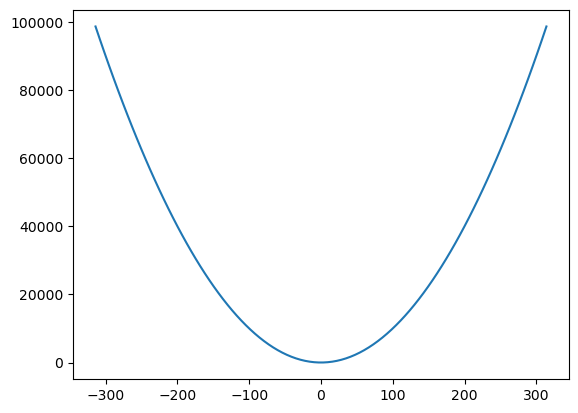

In [151]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-np.pi*100, np.pi*100, 100)
y = x**2 + np.cos(x)

plt.plot(x, y)
plt.show()

## E13.5 - 
Given the matrices, solve the system of equations $[A].\{X\} = \{B\}$

$$ A=
 \begin{bmatrix}
   1 & 1 & 1 \\\\
   1 & 2 & 2 \\\\
   2 & 1 & 3 
\end{bmatrix}
$$

$$ X=
 \begin{bmatrix}
   x_1 \\\\
   x_2 \\\\
   x_3 
\end{bmatrix}
$$

$$ B=
 \begin{bmatrix}
   6 \\\\
   9 \\\\
   11 
\end{bmatrix}
$$

In [30]:
import sympy as sp

In [34]:
x1, x2, x3 = sp.symbols(['x1', 'x2', 'x3'])
A = sp.Matrix([[1, 1, 1],
               [1, 2, 2],
               [2, 1, 3]])
x = sp.Matrix([x1, x2, x3])
B = sp.Matrix([6, 9, 11])

system = A*x - B

In [35]:
system

Matrix([
[     x1 + x2 + x3 - 6],
[ x1 + 2*x2 + 2*x3 - 9],
[2*x1 + x2 + 3*x3 - 11]])

In [36]:
sp.linsolve(system, (x1, x2, x3))

{(3, 2, 1)}

## E13.6 - 
Solve the ODE:
$$ \ \ \frac{dy}{dx} = \frac{x^2}{y} $$

In [1]:
import sympy as sp
sp.init_printing()

In [2]:
x = sp.symbols('x')
y = sp.Function('y')
dydx = sp.Derivative(y(x), x)
ode = dydx - x**2 / y(x)

In [3]:
sp.dsolve(ode)

## E13.7 - 
Solve the ODE:

$$ B)\ \ m\ddot{x}(t) + c\dot{x}(t) + kx(t)=0; \ \ com\ x(0) = x_0 \ e\  \dot{x}(0) = v_0   $$

In [176]:
t, m, c, k, x0, v0 = sp.symbols(['t', 'm', 'c', 'k', 'x0', 'v0'])
C1, C2 = sp.symbols(['C1', 'C2'])

In [172]:
x = sp.Function('x')
dx = sp.Derivative(x(t), t)
ddx = sp.Derivative(x(t), t, t)

ode = m*ddx + c*dx + k*x(t)

In [175]:
sol = sp.dsolve(ode)
print(sol)

Eq(x(t), C1*exp(t*(-c + sqrt(c**2 - 4*k*m))/(2*m)) + C2*exp(-t*(c + sqrt(c**2 - 4*k*m))/(2*m)))


In [179]:
x_t0 = (C1*sp.exp(t*(-c + sp.sqrt(c**2 - 4*k*m))/(2*m)) + C2*sp.exp(-t*(c + sp.sqrt(c**2 - 4*k*m))/(2*m))).subs(t, 0)
dx_t0 = (sp.diff(x_t, t)).subs(t, 0)

In [182]:
eq1 = x_t0 - x0
eq2 = dx_t0 - v0

system = sp.Matrix([[eq1], 
                    [eq2]])

system

⎡                      C₁ + C₂ - x₀                       ⎤
⎢                                                         ⎥
⎢   ⎛        ____________⎞      ⎛       ____________⎞     ⎥
⎢   ⎜       ╱  2         ⎟      ⎜      ╱  2         ⎟     ⎥
⎢C₁⋅⎝-c + ╲╱  c  - 4⋅k⋅m ⎠   C₂⋅⎝c + ╲╱  c  - 4⋅k⋅m ⎠     ⎥
⎢───────────────────────── - ──────────────────────── - v₀⎥
⎣           2⋅m                        2⋅m                ⎦

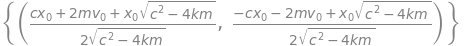

In [204]:
sp.nonlinsolve(system, (C1, C2))

## E13.8 - 
Solve the following ODE using sympy and adopting the given values. In the scipy chapter, we will do this exercise again.

$$ \ \ m\ddot{x}(t) + c\dot{x}(t) + kx(t)=0; \ \ with\ x(0) = x_0 \ and\  \dot{x}(0) = v_0   $$

To make the comparison, we will adopt the values:
$$ \ \ 10\ddot{x}(t) + 20\dot{x}(t) + 50x(t)=0; \ \ with\ x(0) = 10 \ and\  \dot{x}(0) = 0   $$

In [4]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

from sympy import exp, sqrt, sin, cos

In [5]:
t = sp.symbols('t')
C1, C2 = sp.symbols(['C1', 'C2'])
x = sp.Function('x')
dx = sp.Derivative(x(t), t)
ddx = sp.Derivative(x(t), t, t)

In [6]:
ode = 10*ddx + 20*dx + 50*x(t)

In [7]:
print(sp.dsolve(ode))

Eq(x(t), (C1*sin(2*t) + C2*cos(2*t))*exp(-t))


In [8]:
x_res = (C1*sin(2*t) + C2*cos(2*t))*exp(-t)
dx_res = sp.diff(x_res, t)

In [9]:
eq1 = x_res.subs(t, 0) - 10

sp.solveset(eq1, C2)

In [10]:
eq2 = dx_res.subs(t, 0).subs(C2, 10)
sp.solveset(eq2, C1)

In [11]:
x_res = x_res.subs(C1, 5).subs(C2, 10)
dx_res = sp.diff(x_res, t)

In [12]:
t_data = np.linspace(0, 10, 100)
x_data = [x_res.subs(t, i) for i in t_data]
dx_data = [dx_res.subs(t, i) for i in t_data]

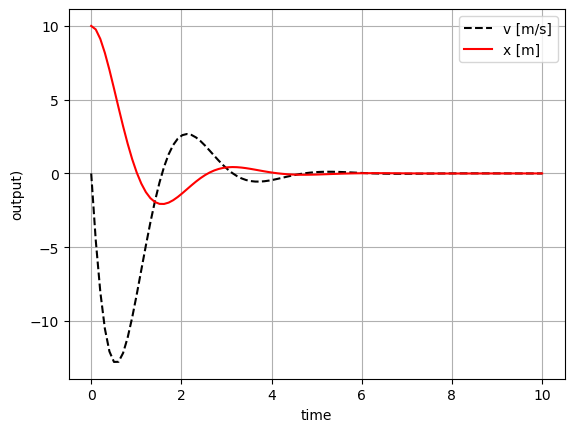

In [19]:
plt.plot(t_data, dx_data, 'k--', label='v [m/s]')
plt.plot(t_data, x_data, 'r-', label='x [m]')
plt.xlabel('time')
plt.ylabel('output)')
plt.grid()
plt.legend()
plt.show()